In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
 
# 3. Load red wine data.
data = pd.read_csv("/Users/lana-n/datacsv/diabetes.csv", sep=',')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [2]:
#data.isnull().sum()

In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
#data.info()

In [6]:
data['Outcome'] = data['Outcome'].map({'YES': 1, 'NO': 0})
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

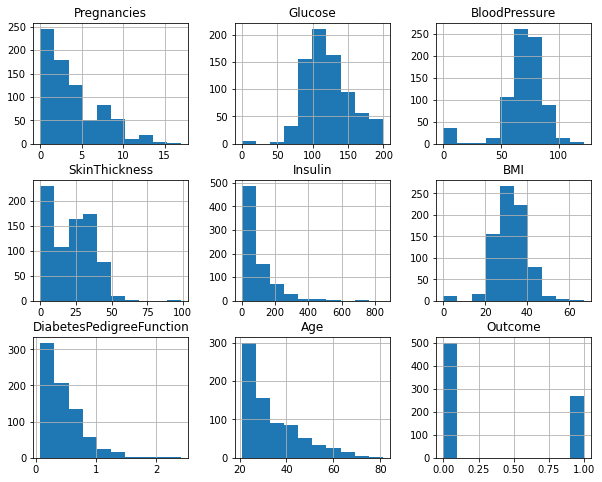

In [7]:
data.hist(figsize=(10,8))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

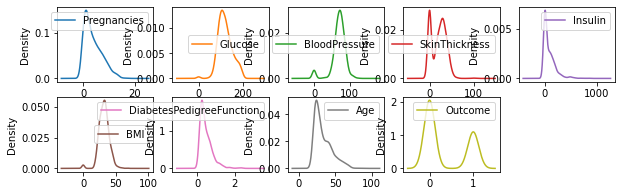

In [8]:
data.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize=(10, 8))

<AxesSubplot:>

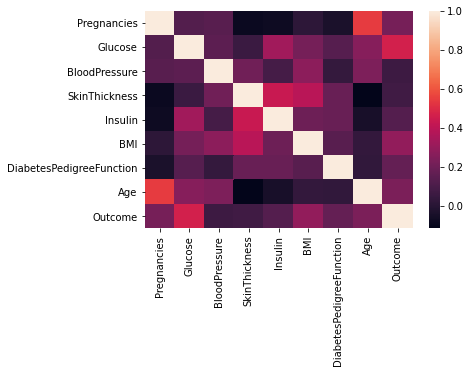

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values,
           yticklabels=corr.columns.values)

In [10]:
from sklearn.model_selection import train_test_split

x = data.iloc[:,0:8]
y = np.ravel(data.Outcome)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

In [11]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping

#Initialize the model
model=Sequential()

# Build input layer & Hidden layer
#model.add(Dense(units=64, activation='relu', input_dim=8))
#model.add(Dropout(rate=0.1))

# Building second layer
model.add(Dense(units=32,activation ='relu'))
model.add(Dropout(rate=0.1))

# Building 3rd layer
model.add(Dense(units=16,activation ='relu'))
model.add(Dropout(rate=0.1))

# Building 4th layer
model.add(Dense(units=8,activation ='relu'))
model.add(Dropout(rate=0.1))

#Adding outer layer
#model.add(Dense(units = 1, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

In [14]:
#model.compile(optimizer='adam', loss='mae', metrics = ['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [15]:
#Fit model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=100)

#train model:   Test accuracy: 0.4959   epochs=300
history = model.fit(x_train, y_train,
 epochs=200,
 batch_size=50,
 validation_split=0.25,
 callbacks=[early_stopping_minitor])

Epoch 1/200
9/9 [==============================] - 1s 20ms/step - loss: 0.6673 - accuracy: 0.5995 - val_loss: 0.6495 - val_accuracy: 0.7083
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.7106 - val_loss: 0.6068 - val_accuracy: 0.7083
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5828 - accuracy: 0.7199 - val_loss: 0.5797 - val_accuracy: 0.6806
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7361 - val_loss: 0.5635 - val_accuracy: 0.6944
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5293 - accuracy: 0.7338 - val_loss: 0.5468 - val_accuracy: 0.7292
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.7431 - val_loss: 0.5259 - val_accuracy: 0.7500
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7639 - val_loss: 0.5115 - val_accuracy: 0.7431
Epoch 8/200
9/9 [=========

In [16]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 790us/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


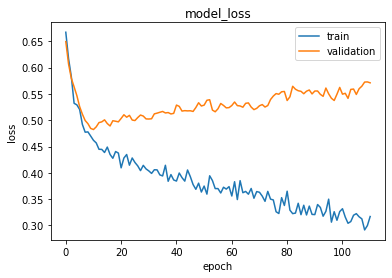

In [17]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [24]:
y_pred = y_pred.round()
y_pred.T

array([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.]],
      dtype=float32)

In [25]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [20]:
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

[[94 29]
 [24 45]]


In [21]:
accuracy_score(y_test, y_pred)

0.7239583333333334

In [22]:
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.7239583333333334
